# Illustration of Sampling Distriubtion using NHANES data
---

This notebook continues using the NHANES data to explore the sampling distributions of statistics. The topics are theoretical and conceptual, intended to clarify some important concepts about statistcal methods.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("nhanes_2015_2016.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

# Sampling Distribution of the Mean

Sampling distributions describe how the value of a statistic computed from data varies when repeated samples of data are obtained. This can be explored using tools from theoretical statistics, or by using a computer to simulate data repeatedly from a hypothetical population.

When working with non-simulated data (i.e. from a study like NHANES), we usually do not have the ability to explicitly obtain an "independent copy" of the sample to actually "see" its sampling distribution. However we can "subsample" from a dataset to mimic what would happen if we were to sample repeatedly from the population that produced it. A subsample is a random sample drawn from a larger data set, containing only a fraction of its observations.

In the notebook cell below, we repeatedly subsample two disjoint subsets of size 100 from the NHANES data, calculate the mean systolic blood pressure within each of these two subsets, then calculate the difference between these two means. This difference reflects the "chance variation" that would have been observed if the NHANES project had only had the resources to sample 100 participants for their study. By sampling two subsets of size 100 and comparing the resulting calculated means, we can see how the findings of two researchers independently studying the same population might differ from each other by chance.

The subsampling process described above is then repeated 1000 times, so we can see how two samples of size 100 from the NHANES population tend to differ in terms of their mean systolic blood pressure.

In [5]:
# subsample size
size = 100
# list to store subsample mean difference
diff_means = []

for i in range(1000):

  sampled_dataset = df.sample(2 * size)
  first_subsample = sampled_dataset.iloc[0:size, :]
  second_subsample = sampled_dataset.iloc[size:, :]

  diff_means.append(np.mean(first_subsample['BPXSY1']) - np.mean(second_subsample['BPXSY1']))


Next, we look at the histogram of the 1000 mean differences generated above.

The values typically fall between -5 and 5. This means that two researchers independently studying blood pressure in the same population may by chance obtain sample means that are up to around 5 units different, but are quite unlikely to obtain sample means that are by chance more than 10 units different.

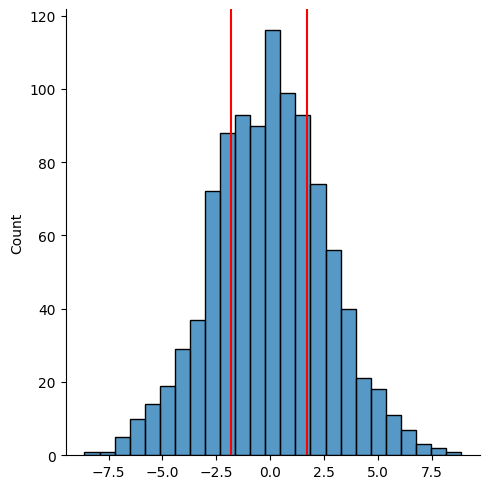

In [6]:
sns.displot(diff_means)
plt.axvline(np.quantile(diff_means, 0.25), color = 'red')
plt.axvline(np.quantile(diff_means, 0.75), color = 'red');

Let's look at some numerical statistics of the histogram plotted above.

In [7]:
pd.Series(diff_means).describe()

,0
count,1000.000000
mean,-0.028919
std,2.638743
min,-8.614011
25%,-1.803188
50%,-0.030099
75%,1.710671
max,8.855511


The results shown above indicate that the systolic blood pressures calculated for two samples each with 100 people will typically differ by around 2.7 mm/Hg (standard deviation).

The sample size is a major determinant of the chance fluctuations in any statistic. Above we used samples of size 100, below we perform the same analysis using samples of size 400.

In [8]:
# subsample size
size = 400
# list to store subsample mean difference
diff_means = []

for i in range(1000):

  sampled_dataset = df.sample(2 * size)
  first_subsample = sampled_dataset.iloc[0:size, :]
  second_subsample = sampled_dataset.iloc[size:, :]

  diff_means.append(np.mean(first_subsample['BPXSY1']) - np.mean(second_subsample['BPXSY1']))


,0
count,1000.000000
mean,-0.006417
std,1.340022
min,-4.323848
25%,-0.872933
50%,-0.018020
75%,0.889672
max,4.522911


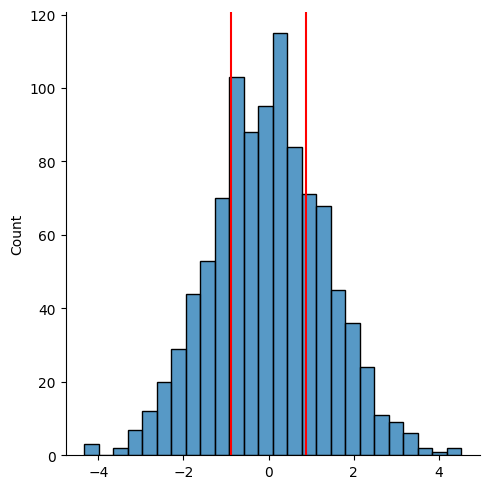

In [11]:
sns.displot(diff_means)
plt.axvline(np.quantile(diff_means, 0.25), color = 'red')
plt.axvline(np.quantile(diff_means, 0.75), color = 'red');

pd.Series(diff_means).describe()

We can see that with samples of size 400, the standard deviation is around 1.38, which is close to half of what it was when we used samples of size 100. The smaller standard deviation indicates that the chance flucatations in the mean systolic blood pressure are samller when we have a larger sample size. There is greater precision in estimating the population mean systolic blood pressure with a sample size of 400 compared to 100.

### Theory
Increasing the sample size by a factor of 4 (from 100 to 400) led to a reduction of the standard deviation by a factor of 2. This scaling behavior is very common in statistics -- increasing the sample size by a factor of K leads to a reduction in the standard deviation by a factor of sqrt(K). Thus, for a factor of 4 increase in the sample size we see a factor of 2 reduction in standard deviation. Similarly, for a factor of 9 increase in the sample size we would typically see a factor of 3 reduction in the standard deviation.

# Sampling Distribution of Correlation Coefficient
---

Many statistics that are more complex than the sample mean behave similarly to the mean in terms of their sampling behavior. Below we modify the subsampling analysis from above to consider the Pearson correlation coefficient between systolic and diastolic blood pressure.

In [14]:
for sample_size in [100, 400]:

  difference = []

  for i in range(1000):
    sample_df = df.sample(2 * sample_size)
    sample_df1 = sample_df.iloc[0:sample_size, :]
    sample_df2 = sample_df.iloc[sample_size:, :]

    corr_coef1 = sample_df1.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0, 1]
    corr_coef2 = sample_df2.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0, 1]
    difference.append(corr_coef1 - corr_coef2)

  print("Sample Size: {} | SD: {} | Approximated SD: {}".format(sample_size, np.std(difference), np.sqrt(2 / sample_size)))

Sample Size: 100 | SD: 0.17130738815637966 | Approximated SD: 0.1414213562373095
Sample Size: 400 | SD: 0.09011305634688146 | Approximated SD: 0.07071067811865475


The simulation above shows that when the subsample size increases from 100 to 400 (a factor of 4), the standard deviation of the difference between two correlation coefficients decreases by roughly a factor of 2. The mathematical expression sqrt(2 / m) is an approximation to this standard deviation that can be computed without access to any data.

# Shape of Sampling Distribution

The focus above was on the magnitude of the difference between a statistic calculated on two independent samples from a population. Here we focus instead on the shape of the distribution of statistics calculated on subsamples.

The Central Limit Theorem imples that many (but not all) statistics have approximately normal sampling distributions, even if the underlying data are not close to being normally distributed.

Let's illustrate this phenomenon using the systolic blood pressure data from the NHANES study.

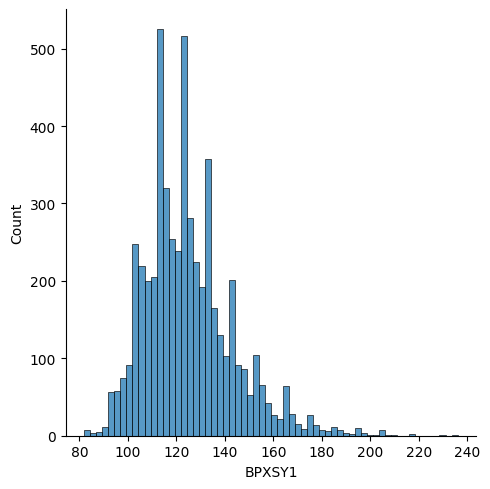

In [15]:
sns.displot(df['BPXSY1'].dropna())

The histogram shows the distribution of individual systolic blood pressure values are slightly right-skewed.

Next, 1000 sample means from 1000 subsamples of size 50 and inspect their distribution.

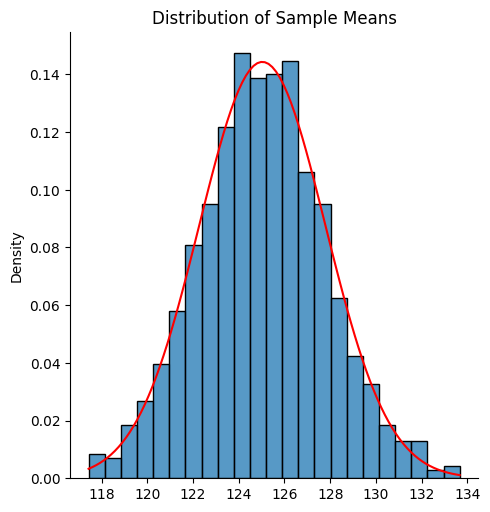

In [18]:
size = 50
blood_pressure_mean = []

for i in range(1000):
  sample_df = df.sample(size)
  blood_pressure_mean.append(np.mean(sample_df['BPXSY1'].dropna()))

ax = sns.displot(blood_pressure_mean, stat = 'density')
ax.set(title = "Distribution of Sample Means")

# the code below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(blood_pressure_mean), np.max(blood_pressure_mean), 100)
from scipy.stats.distributions import norm as normal
y = normal.pdf(x, np.mean(blood_pressure_mean), np.std(blood_pressure_mean))
plt.plot(x, y, color = 'red');

The plots above show that while the distribution of individual systolic blood pressure measures is somewhat skewed to the right, the distribution of means of size 50 is approximately symmetric. The distribution of means is also approximately normal, as shown by the red curve, which is the best-fitting normal approximation to the data.

# Notes

* The idea conveyed was of sampling distributions. From the NHANES dataset, subsamples were taken, and sampling estimates were calculated to show properties of various sampling distributions.